## Lab2 Goals: leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps

### The grading will center around 5 main points:
• Does the report include a section describing the data?

• Does the report include a paragraph detailing the main objective(s) of this analysis?

• Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.

• Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?

• Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?

### Sections required in your report:
• Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

• Brief description of the data set you chose and a summary of its attributes.

• Brief summary of data exploration and actions taken for data cleaning and feature engineering.

• Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

• A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

• Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

• Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

### Import the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sklearn
sklearn.__version__

'1.3.2'

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


## 1. Describing the Data

In [20]:
df = pd.read_csv('insurance.csv')

In [21]:
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
df = df.replace({'sex': {'female': 1, 'male': 0}})
df = df.replace({'region': {'northeast': 1, 
                         'northwest': 2,
                         'southwest': 3,
                         'southeast': 4}})

In [40]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.544843,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,3.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,4.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [39]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns: ")
print(f"- There are {df['charges'].isnull().sum()} missing values in the 'charges' column.")
print(f"- The range of 'age' is from {df['age'].min()} to {df['age'].max()}.")
print(f"- The most common region is '{df['region'].mode()[0]}' with {df['region'].value_counts().max()} occurrences.")

The dataset contains 1338 rows and 7 columns: 
- There are 0 missing values in the 'charges' column.
- The range of 'age' is from 18 to 64.
- The most common region is 'southeast' with 364 occurrences.


smoker
no     1064
yes     274
Name: count, dtype: int64

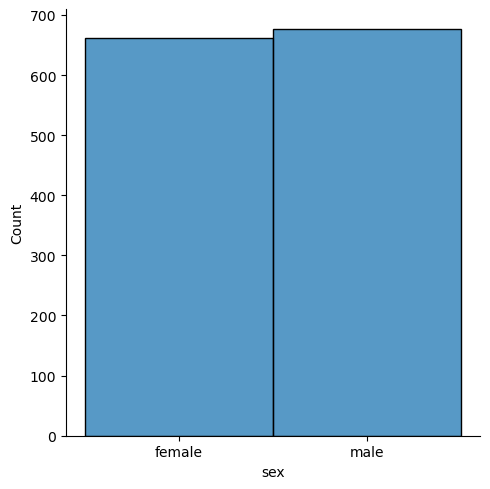

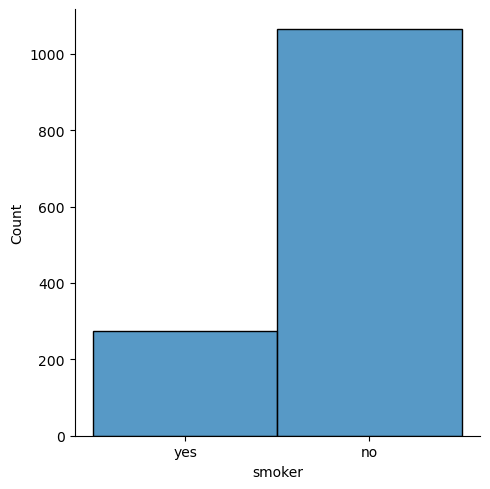

In [51]:
sns.displot(df['sex'])
df['sex'].value_counts()
sns.displot(df['smoker'])
df['smoker'].value_counts()

/tmp/ipykernel_23954/3673060014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
/tmp/ipykernel_23954/3673060014.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
/t

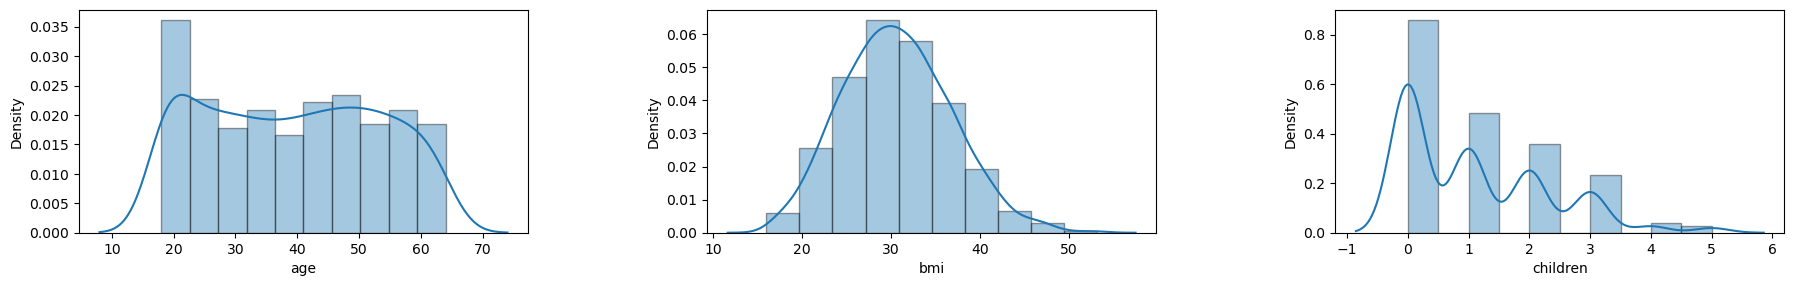

In [47]:
fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.distplot(df['age'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 2)
sns.distplot(df['bmi'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 3)
sns.distplot(df['children'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
plt.show()

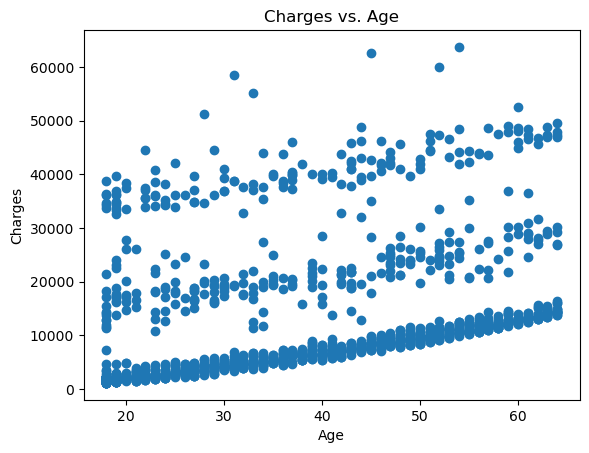

Correlation: 0.29900819333064754


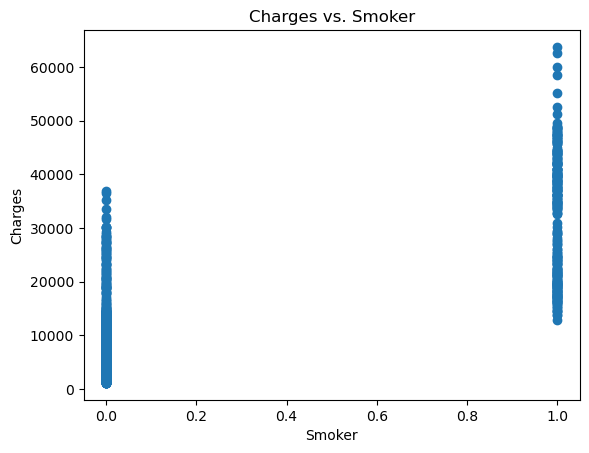

Correlation: 0.7872514304984779


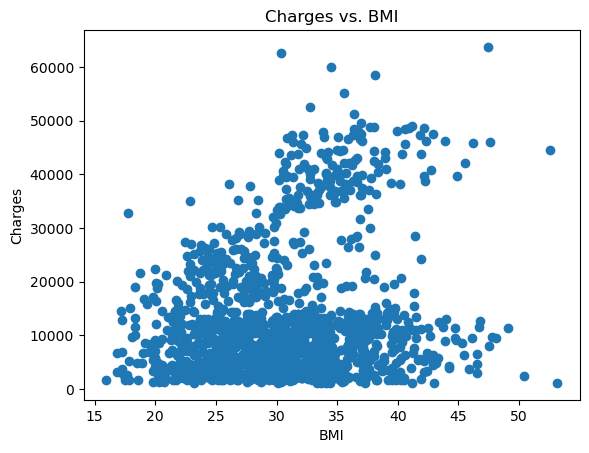

Correlation: 0.19834096883362895


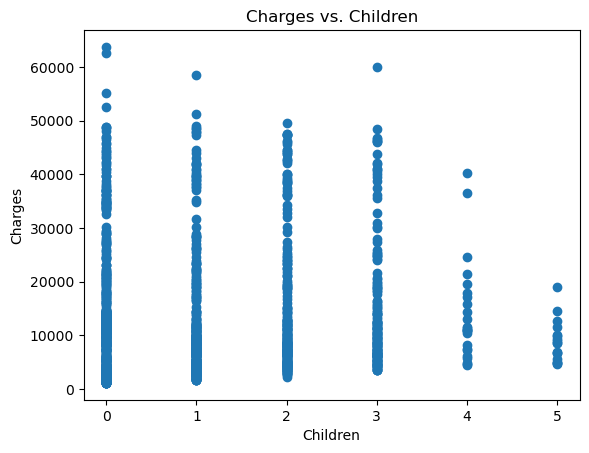

Correlation: 0.0679982268479048


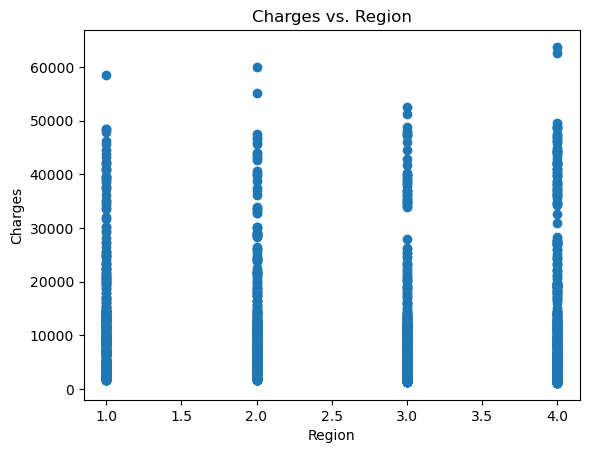

Correlation: 0.039473383476402155


In [43]:
plt.scatter(df['age'], df["charges"])
plt.title(f"Charges vs. Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()
correlation = df['age'].corr(df["charges"])
print("Correlation:", correlation)

plt.scatter(df['smoker'], df["charges"])
plt.title(f"Charges vs. Smoker")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()
correlation = df['smoker'].corr(df["charges"])
print("Correlation:", correlation)


plt.scatter(df['bmi'], df["charges"])
plt.title(f"Charges vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()
correlation = df['bmi'].corr(df["charges"])
print("Correlation:", correlation)

plt.scatter(df['children'], df["charges"])
plt.title(f"Charges vs. Children")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()
correlation = df['children'].corr(df["charges"])
print("Correlation:", correlation)

plt.scatter(df['region'], df["charges"])
plt.title(f"Charges vs. Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()
correlation = df['region'].corr(df["charges"])
print("Correlation:", correlation)

## 2. Objectives

Dữ liệu này có thể được sử dụng để phân tích mối quan hệ giữa các yếu tố như tuổi, giới tính, chỉ số BMI, số lượng con cái, trạng thái hút thuốc và khu vực địa lý với chi phí bảo hiểm y tế

## 3. Linear Regression Model

1. Linear regression: \
Dùng thư viện linear regression của sklearn để tìm ra đường thẳng fit nhất với các giá trị trong dataset.\
Sau đó kiểm tra thì có được Mean Squared Error: 0.22952487683968567 và R-squared: 0.7833463107364539.   \
Trong đó:\
MSE = 1/n sum((yi - ypred)^2) và R-squared= sum((yi-ypred)^2)/sum((yi-ymean))^2 ( với yi là giá trị thực, ypred là giá trị dự đoán, ymean là giá trị trung bình của sample) \
Với giá trị MSE và R-squared thế này thì model không quá tệ nhưng cần thử model khác

2. Polynomial:\
Thêm polynomial feature với bậc 2 từ thư viện sklearn thì ta có được kết quả như sau:\
Mean Squared Error: 0.14009977724731884\
R-squared: 0.867756671853774\
MSE đã giảm và R-squared tăng, chứng tỏ model này đã tốt hơn so với model linear regression đầu và model này đã là khá tốt\

3. Ridge \
Ridge Regression được sử dụng để giảm overfitting \
Ridge Regression thêm một thành phần chuẩn hóa (L2 regularization) vào hàm mất mát để kiểm soát giá trị của các tham số\
Tuy nhiên trong bài toán này model linear cũng không quá overfit nên ảnh hưởng của ridge regression là không lớn\
Mean Squared Error: 0.14012847451979213\
R-squared: 0.867729583853385


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['age', 'bmi', 'charges']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())

        age  sex       bmi  children  smoker  region   charges
0 -1.438764    1 -0.453320         0       1       3  0.298584
1 -1.509965    0  0.509621         1       0       4 -0.953689
2 -0.797954    0  0.383307         3       0       4 -0.728675
3 -0.441948    0 -1.305531         0       0       2  0.719843
4 -0.513149    0 -0.292556         0       0       2 -0.776802


In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])

df['smoker'] = label_encoder.fit_transform(df['smoker'])

df['region'] = label_encoder.fit_transform(df['region'])
print(df.head())


        age  sex       bmi  children  smoker  region   charges
0 -1.438764    1 -0.453320         0       1       2  0.298584
1 -1.509965    0  0.509621         1       0       3 -0.953689
2 -0.797954    0  0.383307         3       0       3 -0.728675
3 -0.441948    0 -1.305531         0       0       1  0.719843
4 -0.513149    0 -0.292556         0       0       1 -0.776802


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.22890865365733312
R-squared: 0.7839279776463969


In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.13876388995166838
R-squared: 0.8690176458929634


In [54]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.13876164845483913
R-squared: 0.8690197616921927


## 4. Insights and key findings

1. Data Overview:\
Dữ liệu không có giá trị thiếu, điều này làm tăng độ tin cậy của mô hình hóa.

2. Descriptive Statistics:\
Cột "charges" (chi phí bảo hiểm y tế) có sự biến động rất lớn, từ 1,121 đến 63,770. Điều này có thể là do nhiều yếu tố ảnh hưởng đến chi phí.\
Các cột charges, age và children phân bố rất lệch

3. Polynomial Regression:\
Mô hình hồi quy đa thức bậc 2 được áp dụng để hiểu mối quan hệ phức tạp giữa các biến đầu vào và chi phí bảo hiểm.

4. Interpretation:\
Mô hình có hiệu suất tốt trên tập kiểm tra, được đánh giá bằng Mean Squared Error và R-squared. R-squared đạt khoảng 0.87, cho thấy mô hình giải thích được 87% sự biến động trong chi phí.

5. Evaluate:\
Mean Squared Error thấp (khoảng 0.14) cho thấy sự chênh lệch giữa dự đoán và thực tế là thấp.\
R-squared cao chỉ ra mô hình có khả năng giải thích một phần lớn biến động trong dữ liệu.

6. Restriction:\
Mặc dù mô hình hoạt động tốt trên tập train, nhưng cần thêm nhiều dữ liệu mới để đánh giá lại mô hình. Hoặc có thể chia lại dữ liệu thành tập train, val và test để có thể tinh chỉnh thêm về tham số

7. Further:\
Có thể xem xét sự mở rộng mô hình bằng cách thử nghiệm các đặc trưng khác nhau hoặc kiểm tra mô hình với dữ liệu mới để đảm bảo tính tổng quát.

## 5. Next step

Có thể thử sử dụng Polynomial Regression với bậc cao hơn để cải thiện hiệu suất mô hình. Tuy nhiên nếu bị overfitting thì cần cần giảm độ phức tạp của mô hình hoặc sử dụng các kỹ thuật chống quá mức khớp như regularization.